# Predicting Sentiment for Reviews (comments) in modern Azerbaijani movies


In this notebook, we will evaluate the model on real movie
reviews taken from the internet. We will conduct a sentiment analysis based on the comments of 33 modern Azerbaijan movies and we will have a general idea about the movie. A large amount of data is unstructured, which requires processing to generate insights. Some examples of unstructured data are news articles, posts on social media, and search history. The process of analyzing natural language and making sense out of it falls under the field of Natural Language Processing (NLP). As I mentioned in the last notebooks, Sentiment analysis is a common NLP task, which involves classifying texts or parts of texts into a pre-defined sentiment. We will use the Natural Language Toolkit (NLTK), a commonly used NLP library in Python, to analyze textual data.

Once the dataset is ready for processing, you will train a model on pre-classified tweets and use the model to classify the sample tweets into negative and positives sentiments.

## 1. Loading comments for movies

After importing required modules, we have to load comments for every movie from youtube. After getting all data we need, we will make predictions for these new review texts by using the model which we have developed in the previous notebook. All movie comments has been scrapped within in the csv file format. Let's looking at the one movie comments:

In [0]:
from os import listdir
import pandas as pd
import string
import re
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt;plt.rcdefaults()

data = pd.read_csv('AZERBAIJANI MOVIES REVIEWS\\İkinci Perde.csv')
data

authorDisplayName                              authorProfileImageUrl  \
0     Shahla Mammadova  https://yt3.ggpht.com/a/AATXAJwV9YkgkpE4mjEzvf...   
1        Shssj Dhdhdjd  https://yt3.ggpht.com/a/AATXAJzSbiBUNqKzS5g_w3...   
2      Deyanet Abbasov  https://yt3.ggpht.com/a/AATXAJzdJiSSXhIHK_3uc1...   
3        Musa Velizade  https://yt3.ggpht.com/a/AATXAJych1Fvyiqil2HNp4...   
4      Elmin Ismayilov  https://yt3.ggpht.com/a/AATXAJwmiw6rjVzLd8B6Bs...   
...                ...                                                ...   
6339     Okuw Sovetski  https://yt3.ggpht.com/a/AATXAJwkJpENP5HcqwupWn...   
6340    LeCœur DelaMer  https://yt3.ggpht.com/a/AATXAJyUuSR3xSwVRLZQhL...   
6341    Fariz Mahmudov  https://yt3.ggpht.com/a/AATXAJyxYkVXvnnclLoEIr...   
6342  Nusret Semedzade  https://yt3.ggpht.com/a/AATXAJxWvY7dKp5JkhLA5W...   
6343     Vusal Abbasov  https://yt3.ggpht.com/a/AATXAJxF2gv5oysm1Q-TM9...   

                                       authorChannelUrl  \
0     http://www.youtube.com/channel/UC_cAV1dUpND1iq...   
1     http://www.youtube.com/channel/UCvWh5FyMc7L6Zo...   
2     http://www.youtube.com/channel/UCawnk5uaMa_Tlr...   
3     http://www.youtube.com/channel/UCUIPZpy3jp4zGi...   
4     http://www.youtube.com/channel/UC1XlH3h1sDJZk6...   
...                                                 ...   
6339  http://www.youtube.com/channel/UCjlJWK71_CR0O-...   
6340  http://www.youtube.com/channel/UCZNExCsojgQqh_...   
6341  http://www.youtube.com/channel/UC_SQgoYsc7yIjE...   
6342  http://www.youtube.com/channel/UCH6bqjGlUR1498...   
6343  http://www.youtube.com/channel/UCGdH6aNSWLUtOP...   

         authorChannelId/value      videoId  \
0     UC_cAV1dUpND1iqSbS_FjEug  ihgdTu5Ltc8   
1     UCvWh5FyMc7L6ZoeaH0dswUQ  ihgdTu5Ltc8   
2     UCawnk5uaMa_Tlro1tECinPg  ihgdTu5Ltc8   
3     UCUIPZpy3jp4zGiOTAG9mCWQ  ihgdTu5Ltc8   
4     UC1XlH3h1sDJZk6OJYfGG9BA  ihgdTu5Ltc8   
...                        ...          ...   
6339  UCjlJWK71_CR0O-epj13nK-w  ihgdTu5Ltc8   
6340  UCZNExCsojgQqh_Sv8mPkLYg  ihgdTu5Ltc8   
6341  UC_SQgoYsc7yIjEX1oAw5VBg  ihgdTu5Ltc8   
6342  UCH6bqjGlUR1498rc0HeSZ2Q  ihgdTu5Ltc8   
6343  UCGdH6aNSWLUtOPjHqg12mQA  ihgdTu5Ltc8   

                                            textDisplay  \
0     Ay camaat, gorurem haminiz beyenmisiniz, xahis...   
1     Deyirlər yaxşı kişinin arvadı fahişəlik etməz....   
2     Mən Azərbaycan mədəniyyəti,incəsənəti, kino-fi...   
3                                     Superrrrrrr filim   
4             Super film. Eliviz qoluvuz var olsun👏🖤👑🇦🇿   
...                                                 ...   
6339                                            axiriki   
6340  Axır ki, bu filmı yüklәdiniz. Iki dәfә kinotea...   
6341                                       *Nəhayət ki*   
6342  Filmə söz ola bilməz ama axirinda nə oldu onu ...   
6343  Super. Choxdan gozleyirdim. Baxmayanlara deyim...   

                                           textOriginal  canRate viewerRating  \
0     Ay camaat, gorurem haminiz beyenmisiniz, xahis...     True         none   
1     Deyirlər yaxşı kişinin arvadı fahişəlik etməz....     True         none   
2     Mən Azərbaycan mədəniyyəti,incəsənəti, kino-fi...     True         none   
3                                     Superrrrrrr filim     True         none   
4             Super film. Eliviz qoluvuz var olsun👏🖤👑🇦🇿     True         none   
...                                                 ...      ...          ...   
6339                                            axiriki     True         none   
6340  Axır ki, bu filmı yüklәdiniz. Iki dәfә kinotea...     True         none   
6341                                       *Nəhayət ki*     True         none   
6342  Filmə söz ola bilməz ama axirinda nə oldu onu ...     True         none   
6343  Super. Choxdan gozleyirdim. Baxmayanlara deyim...     True         none   

      likeCount               publishedAt                 updatedAt  \
0          1601  2019-03-29T13:14:13.000Z  2019-03-29

As we see from the example above, we have more data points than we need. Since in this notebook, we will only use full comments text. Then, let's explore it:

In [0]:
comments = data['textOriginal']
comments[1]

'Deyirlər yaxşı kişinin arvadı fahişəlik etməz.Bu həyatdan götürülmüş bir kinodur ki, fahiselik etmək istəyən üçün hersey bəhanədir.Heyatda o qədər belə oğlanlar var ki , başına belə iş gelib.Allah uzaq eləsin.'

Our files are csv file format and next, it will be better to convert all files to text format in order to perform NLP tasks. In addition, the term "CSV" also denotes some closely related delimiter-separated formats that use
different field delimiters. These include tab-separated values and space-separated values. A delimiter
that is not present in the field data (such as tab) keeps the format parsing simple. 

These alternate
delimiter-separated files are often even given a .csv extension despite the use of a non-comma field
separator. This loose terminology can cause problems in data exchange. Many applications that accept
CSV files have options to select the delimiter character and the quotation character. 

In [0]:
#convert all cvs files to text files
for filename in listdir("AZERBAIJANI MOVIES REVIEWS"):
    data = pd.read_csv('AZERBAIJANI MOVIES REVIEWS\\'+filename)
    df = data['textOriginal']
    df.to_csv('AZERBAIJAN MOVIES TEXT\\{}.txt'.format(filename), sep=' ', index=False)

C:\Users\NicatZeynalov\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


Now, we have text files for all movies with their fullnames. s the first step, we import the module os.The following variant combines the listdir() method of the os module with a generator function.

As you may have noted before, the listdir() method returns the list of entries for the given directory. The method os.path.isfile() returns True if the given entry is a file. The yield operator quits the function but keeps the current state, and returns only the name of the entry detected as a file. This allows us to loop over the list of entries stored in the folder.

In [0]:
for filename in listdir("AZERBAIJAN MOVIES TEXT"):
    print(filename)

3 Badam 1 qoz.csv.txt
Aktrrsa.csv.txt
Arzularin ardinca.csv.txt
Axinla aşağı.csv.txt
Axirinci yol.csv.txt
Bayram axşamı.csv.txt
Bir xalanın sirri.csv.txt
DƏRS.csv.txt
Gizlenpaç.csv.txt
Hoqqa.csv.txt
Hozu.csv.txt
Kəklikotu.csv.txt
Meleyin opüşü.csv.txt
My name is İntigam.csv.txt
Niyə3.csv.txt
Orta statistik rasim 1.csv.txt
Oxşarabad.csv.txt
Oğlan evi 2.csv.txt
Oğlan evi.csv.txt
Qaranliq.csv.txt
Qorxu altinda.csv.txt
Qız qaçırtma.csv.txt
Shər qarışanda.csv.txt
Stalinin başı.csv.txt
Xoxan.csv.txt
Yarımçıq xatireler.csv.txt
Yerli ecnebi.csv.txt
Yoxdu bele söhbet.csv.txt
Yumurta.csv.txt
Zeher tulugu 3.csv.txt
Zeher tulugu4.csv.txt
İkinci Perde.csv.txt
Əfsanə qayıdır.csv.txt


## 2. Exploring comments 

Before starting, let’s quickly read the file in order to perform different tasks on it. One of the most basic features we can extract is the number of comments in each movie. The basic intuition behind this is that generally, bad movies contain a lesser amount of comments than the good ones. 

In [0]:
# how many comments in every movie
x = 0
for filename in listdir("AZERBAIJAN MOVIES TEXT"):
    with open('AZERBAIJAN MOVIES TEXT\\{}'.format(filename), 'r', encoding = 'utf-8') as f:
        text = f.readlines()
        print('{} movie has {} comments.'.format(filename[:-8], len(text)))
        print('-'*40)
        x +=(len(text))
print(' ')   
print('Overall comments are {}'.format(x))

3 Badam 1 qoz movie has 1351 comments.
----------------------------------------
Aktrrsa movie has 214 comments.
----------------------------------------
Arzularin ardinca movie has 450 comments.
----------------------------------------
Axinla aşağı movie has 30 comments.
----------------------------------------
Axirinci yol movie has 4672 comments.
----------------------------------------
Bayram axşamı movie has 1248 comments.
----------------------------------------
Bir xalanın sirri movie has 2656 comments.
----------------------------------------
DƏRS movie has 384 comments.
----------------------------------------
Gizlenpaç movie has 1874 comments.
----------------------------------------
Hoqqa movie has 1496 comments.
----------------------------------------
Hozu movie has 4606 comments.
----------------------------------------
Kəklikotu movie has 2215 comments.
----------------------------------------
Meleyin opüşü movie has 1017 comments.
----------------------------------------

We sometimes come through the situations where we require to get all the works present in the string, this can be a tedious task done using naive method. Hence having shorthands to perform this task is always useful. Additionally it also includes the cases in which punctuation marks have to be ignored.

Using split function, we can split the string into a list of words and is most generic and recommended method if one wished to accomplish this particular task. But drawback is that it fails in the cases in string contains punctuation marks.

In the cases which contain all the special characters and punctuation marks, as discussed above, the conventional method of finding words in string using split can fail and hence requires regular expressions to perform this task. findall function returns the list after filtering the string and extracting words ignoring punctuation marks.

In [0]:
#Select Words
for filename in listdir("AZERBAIJAN MOVIES TEXT"):
    with open('AZERBAIJAN MOVIES TEXT\\{}'.format(filename), 'r', encoding = 'utf-8') as f:
        text = f.read()
        # split into words by white space
        words = text.split()
        words = [word.lower() for word in words]
        # prepare regex for char filtering
        re_punc = re.compile('[%s]' % re.escape(string.punctuation))
        # remove punctuation from each word
        stripped = [re_punc.sub('', w) for w in words]
        print(stripped[:20])

['httpswwwyoutubecomwatchvaj9hj34fal8', 'filmin', 'klipi', '3', 'badam', '1', 'qoz', 'kim', 'ne', 'deyir', 'desin', 'bir', 'kopuyluy', 'film', 'deyil', '', 'her', 'şey', 'suni', 'alinibguya']
['4354', 'rüfətin', 'zayı', 'burda', 'çixir', '4504', 'də', 'qaraqanın', 'qan', 'və', 'qum', 'treki', 'gedr', 'diqqətlə', 'dinləyin', 'sadəcə', 'möhtəşəm', '👍🏻👍🏻👍🏻👍🏻👍🏻', 'çox', 'gözəl']
['super', 'halaldi', 'chox', 'kederli', 've', 'güzel', 'film', 'idi', 'ellerinize', 'sagliq', 'super', 'ehsen', 'size', 'qeyri', 'adi', 'sujet', 'benzersiz', 'mukemmel', 'bravo👏👏👏👏👏👏', 'baxib']
['heç', 'xoşlamıram', 'pisləməyi', 'tənqid', 'eləməyi', 'kino', 'çəkmək', 'asan', 'iş', 'deyil', 'xüsusilə', 'azərbaycan', 'kimi', 'ölkədə', 'bunun', 'maliyyəsi', 'çəkilişi', 'montajı', 'və', 's']
['film', 'başlayandan', 'qurtarana', 'qədər', 'ölmüşəm', 'şirinə', 'gülməkdən', 'allah', 'şirinin', 'canını', 'sağ', 'eləsin', 'komediya', 'eladi', 'aktyorlar', 'rollarini', 'ustaliqla', 'aparirlar', 'ala', 'ay']
['12753', 'çox', '

As you see, there are some emojies. To accomplish it we will use isalpha() method returns true if all characters in the string are alphabetic and there is at least one character, false otherwise.

In [0]:
#Select Words
# remove all tokens that are not alphabetic
for filename in listdir("AZERBAIJAN MOVIES TEXT"):
    with open('AZERBAIJAN MOVIES TEXT\\{}'.format(filename), 'r', encoding = 'utf-8') as f:
        text = f.read()
        tokens = word_tokenize(text)
        # split into words by white space
        words = text.split()
        words = [word.lower() for word in words]
        words = [word for word in tokens if word.isalpha()]
        # prepare regex for char filtering
        re_punc = re.compile('[%s]' % re.escape(string.punctuation))
        # remove punctuation from each word
        stripped = [re_punc.sub('', w) for w in words]
        print(filename[:-8])
        print(stripped[:15])
        print('-'*60)

3 Badam 1 qoz
['https', 'FILMIN', 'KLIPI', 'BADAM', 'QOZ', 'kim', 'ne', 'deyir', 'desin', 'bir', 'kopuyluy', 'film', 'deyil', 'her', 'şey']
------------------------------------------------------------
Aktrrsa
['rüfətin', 'zayı', 'burda', 'çixir', 'də', 'Qaraqanın', 'və', 'qum', 'treki', 'gedr', 'Diqqətlə', 'dinləyin', 'Sadəcə', 'möhtəşəm', 'Çox']
------------------------------------------------------------
Arzularin ardinca
['Super', 'Halaldi', 'Chox', 'kederli', 've', 'güzel', 'film', 'idi', 'Ellerinize', 'sagliq', 'Super', 'ehsen', 'size', 'Qeyri', 'adi']
------------------------------------------------------------
Axinla aşağı
['Heç', 'xoşlamıram', 'pisləməyi', 'tənqid', 'eləməyi', 'Kino', 'çəkmək', 'asan', 'iş', 'deyil', 'xüsusilə', 'Azərbaycan', 'kimi', 'ölkədə', 'Bunun']
------------------------------------------------------------
Axirinci yol
['Film', 'başlayandan', 'qurtarana', 'qədər', 'ölmüşəm', 'Şirinə', 'gülməkdən', 'Allah', 'şirinin', 'canını', 'sağ', 'eləsin', 'Komediya',

Next, we have to find out most common words for each movie and for this purpose, we will use a counter method. A Counter is a container that keeps track of how many times equivalent values are added. It can be used to implement the same algorithms for which bag or multiset data structures are commonly used in other languages.

Counter, like the other three containers we mentioned above, is a subclass of ‘dict’. It keeps a count of the number of occurrences of any value in the container. Simply speaking, if you add the value ‘hello’ thrice in the container, it will remember that you added it thrice. So, Counter counts hashable objects in Python.

In [0]:
# most common words for every movie
#Select Words
# remove all tokens that are not alphabetic

for filename in listdir("AZERBAIJAN MOVIES TEXT"):
    with open('AZERBAIJAN MOVIES TEXT\\{}'.format(filename), 'r', encoding = 'utf-8') as f:
        text = f.read()
        tokens = word_tokenize(text)
        # split into words by white space
        words = text.split()
        words = [word.lower() for word in words]
        words = [word for word in tokens if word.isalpha()]
        # filter out stop words
        stop_words = set(stopwords.words('azerbaijani'))
        words = [w for w in words if not w in stop_words]
        words = [word for word in words if len(word) > 2]

        # prepare regex for char filtering
        re_punc = re.compile('[%s]' % re.escape(string.punctuation))
        # remove punctuation from each word
        stripped = [re_punc.sub('', w) for w in words]
        c = Counter(stripped)
        print(c.most_common(5))

[('cox', 68), ('super', 68), ('Super', 56), ('Ela', 45), ('film', 33)]
[('film', 36), ('cox', 23), ('gözəl', 20), ('Çox', 19), ('super', 18)]
[('cox', 109), ('gozel', 80), ('film', 66), ('super', 50), ('bele', 44)]
[('bele', 5), ('film', 4), ('Amma', 3), ('kinoda', 3), ('həyatın', 3)]
[('cox', 320), ('super', 236), ('ela', 185), ('gozel', 86), ('film', 81)]
[('super', 89), ('Super', 76), ('cox', 67), ('ela', 54), ('gozel', 47)]
[('film', 102), ('Super', 86), ('cox', 86), ('super', 78), ('Cox', 73)]
[('cox', 40), ('Çox', 37), ('super', 26), ('filmdi', 25), ('Cox', 23)]
[('cox', 169), ('super', 156), ('ela', 76), ('gozel', 66), ('film', 56)]
[('cox', 75), ('film', 53), ('Cox', 51), ('super', 47), ('kino', 45)]
[('cox', 448), ('super', 383), ('Hozu', 278), ('Super', 268), ('gozel', 224)]
[('film', 87), ('cox', 86), ('super', 85), ('Super', 73), ('kino', 65)]
[('cox', 112), ('film', 107), ('gozel', 79), ('super', 53), ('Cox', 52)]
[('super', 21), ('cox', 18), ('Ela', 17), ('Super', 15), ('

Word frequency is word counting technique in which a sorted list of words and their frequency is generated, where the frequency is the occurrences in a given composition. The FreqDist class is used to encode “frequency distributions”, which count the number of times that each outcome of an experiment occurs.

For acquiring the word frequency for each movie we will use ProbDistI class which defines a standard interface for “probability distributions”. FreqDist is creating a dictionary of counts, not frequencies, which is quite alright. Then you can directly plot them by calling the class method plot(), without the need to externally call pyplot. The result is in figure, for the comments of every movie, we’re plotting the frequency of the 10 most frequent tokens.


3 Badam 1 qoz


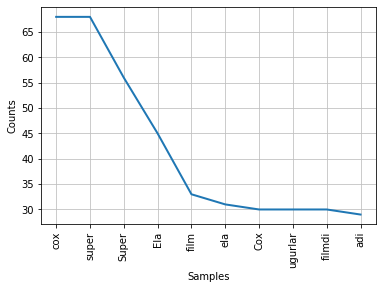

Aktrrsa


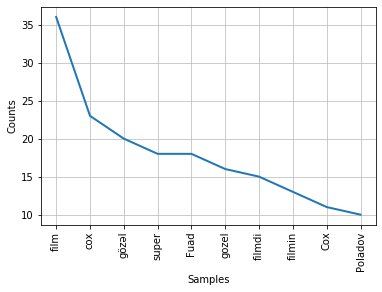

Arzularin ardinca


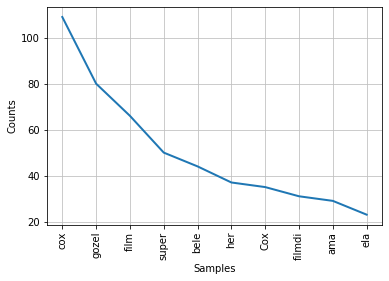

Axinla aşağı


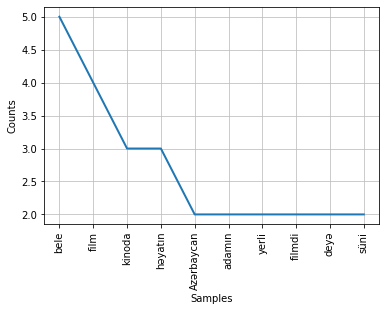

Axirinci yol


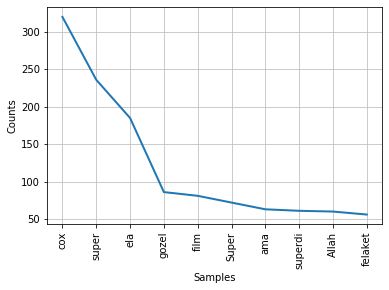

Bayram axşamı


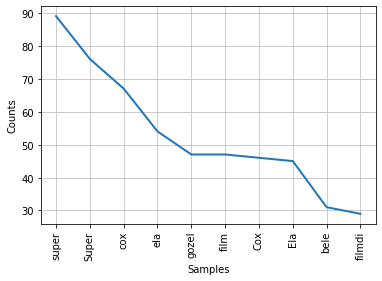

Bir xalanın sirri


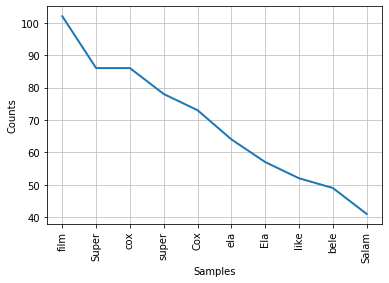

DƏRS


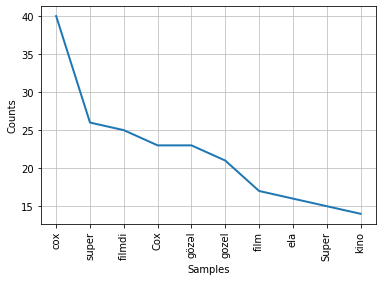

Gizlenpaç


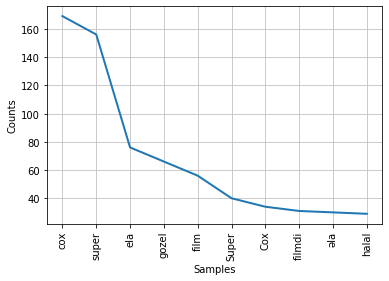

Hoqqa


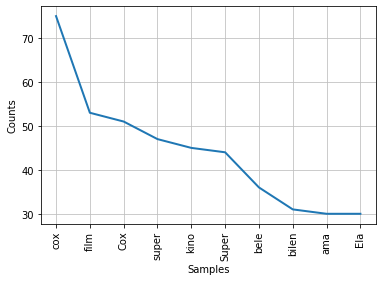

Hozu


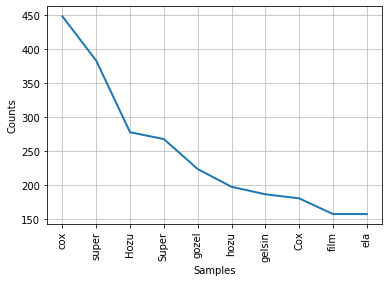

Kəklikotu


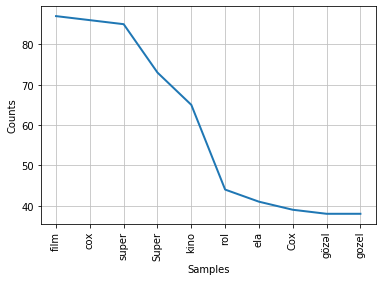

Meleyin opüşü


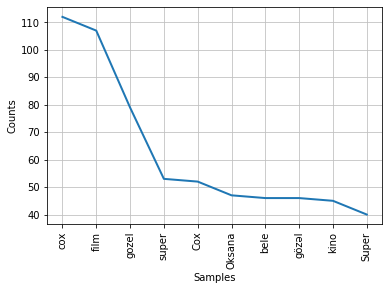

My name is İntigam


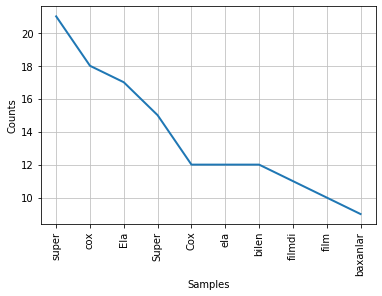

Niyə3


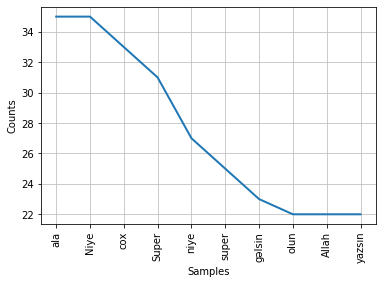

Orta statistik rasim 1


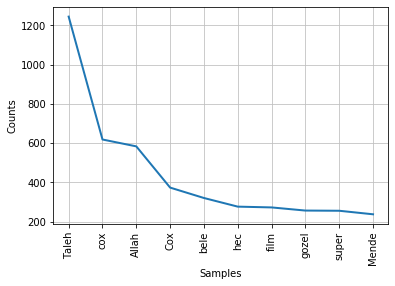

Oxşarabad


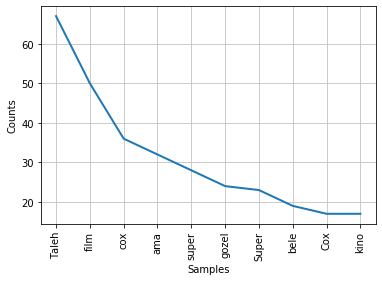

Oğlan evi 2


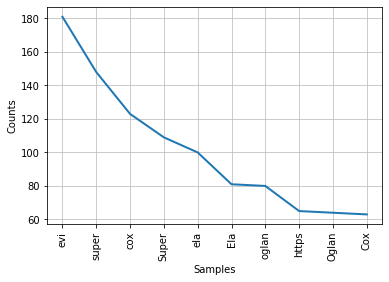

Oğlan evi


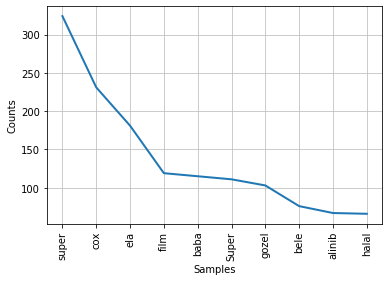

Qaranliq


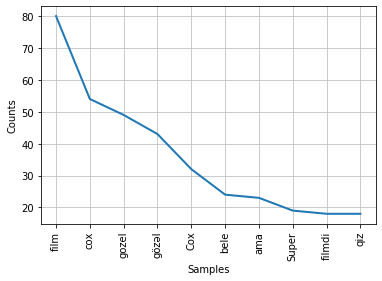

Qorxu altinda


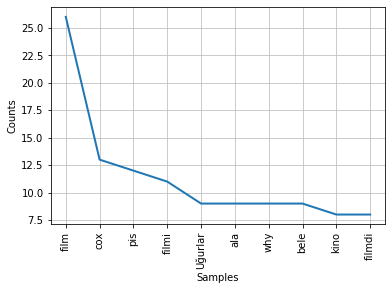

Qız qaçırtma


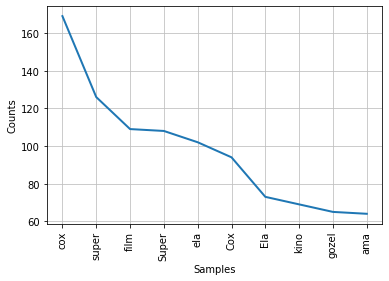

Shər qarışanda


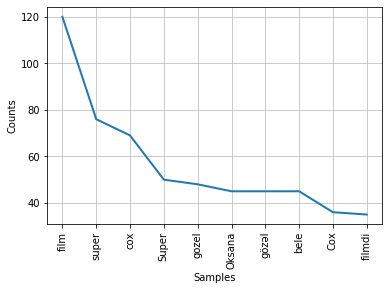

Stalinin başı


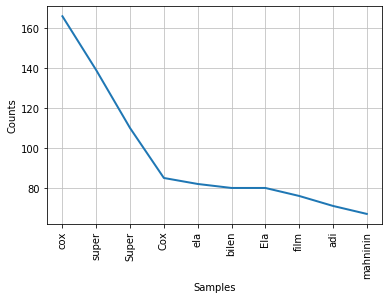

Xoxan


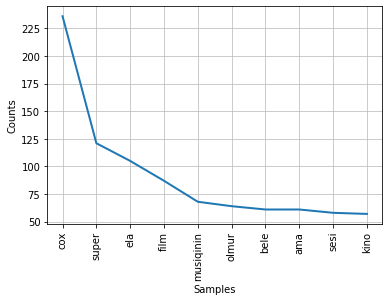

Yarımçıq xatireler


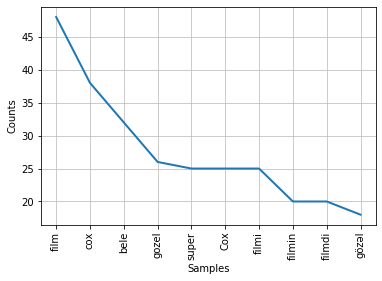

Yerli ecnebi


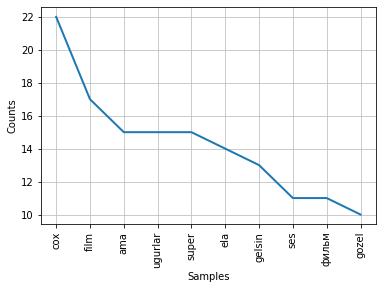

Yoxdu bele söhbet


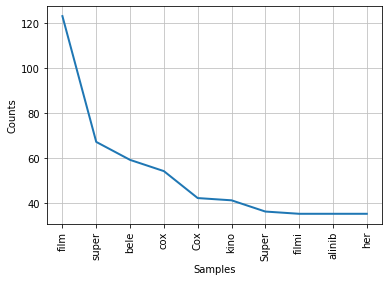

Yumurta


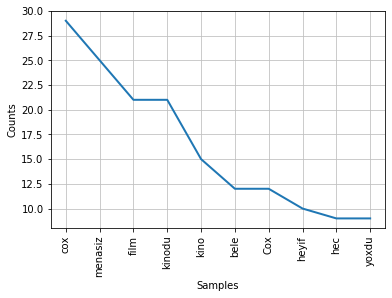

Zeher tulugu 3


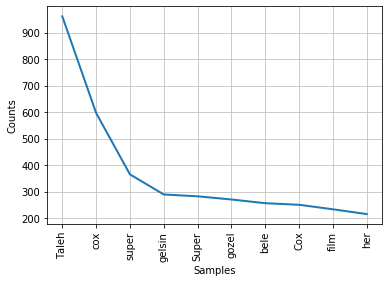

Zeher tulugu4


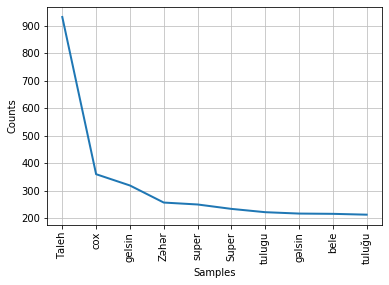

İkinci Perde


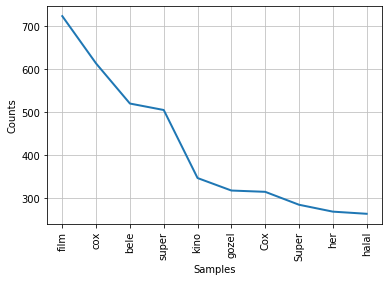

Əfsanə qayıdır


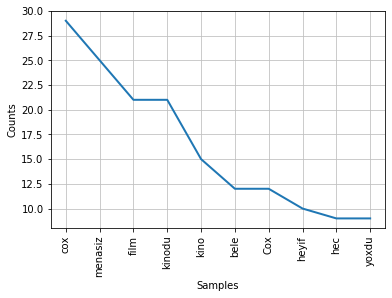

In [0]:
# word frequency
for filename in listdir("AZERBAIJAN MOVIES TEXT"):
    with open('AZERBAIJAN MOVIES TEXT\\{}'.format(filename), 'r', encoding = 'utf-8') as f:
        text = f.read()
        tokens = word_tokenize(text)
        
        # split into words by white space
        words = text.split()
        words = [word.lower() for word in words]
        words = [word for word in tokens if word.isalpha()]
        # filter out stop words
        
        stop_words = set(stopwords.words('azerbaijani'))
        words = [w for w in words if not w.lower() in stop_words]
        words = [word for word in words if len(word) > 2]
        freqdist = nltk.FreqDist(words)
        # Plotting the word frequency distribution
        print(filename[:-8])
        f = freqdist.plot(10)

Next, let's visualize the most frequent words by using word cloud. Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

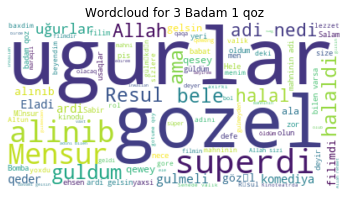

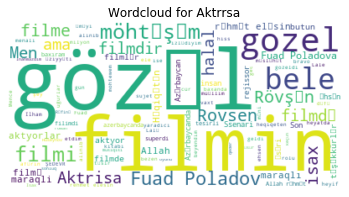

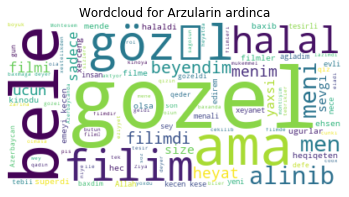

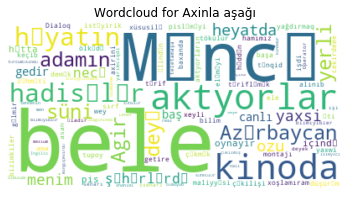

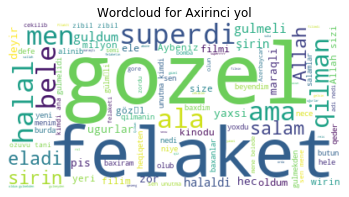

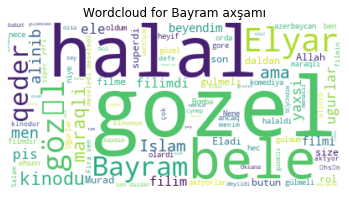

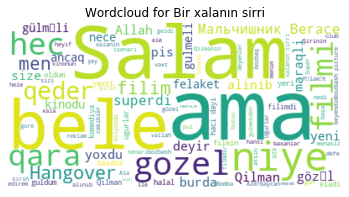

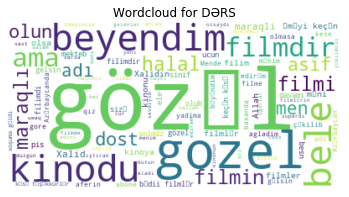

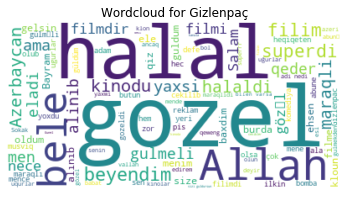

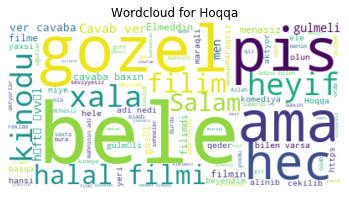

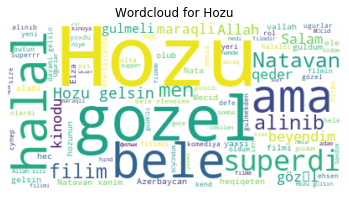

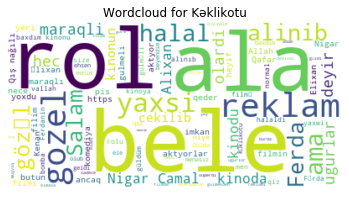

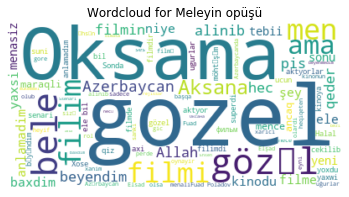

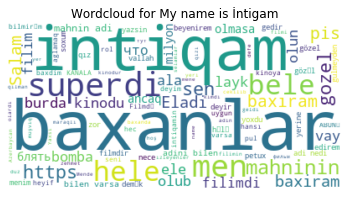

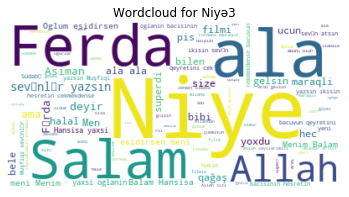

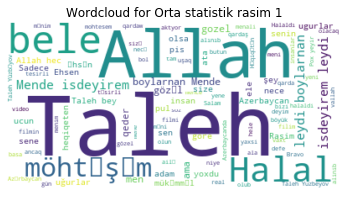

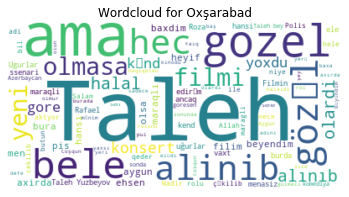

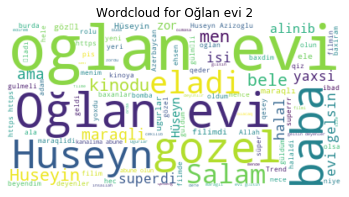

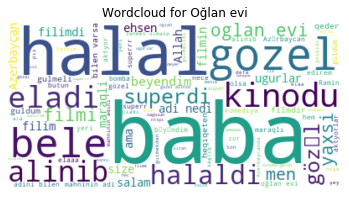

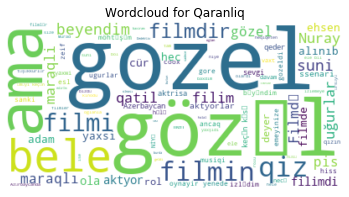

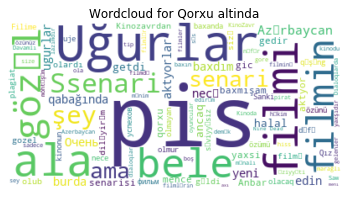

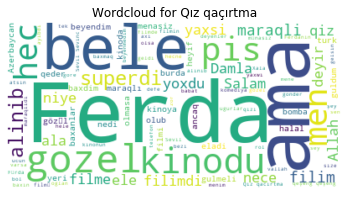

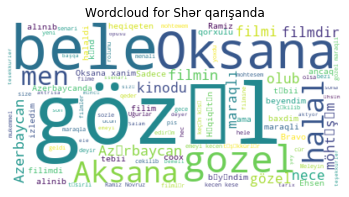

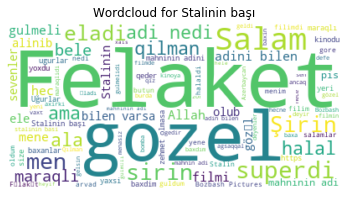

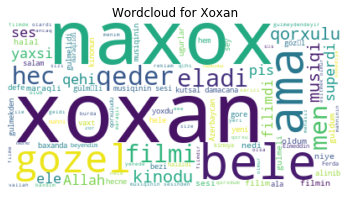

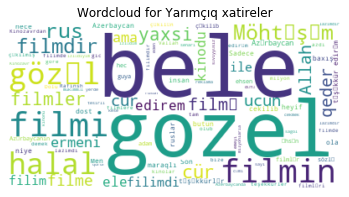

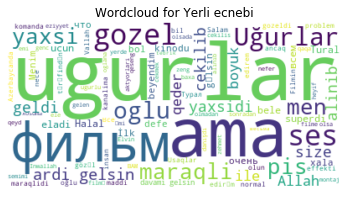

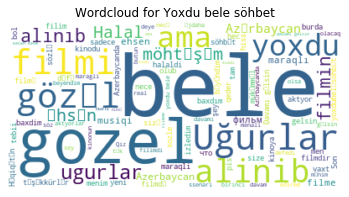

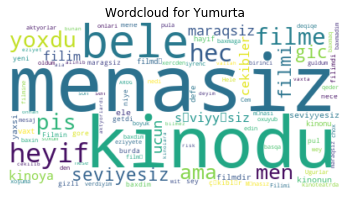

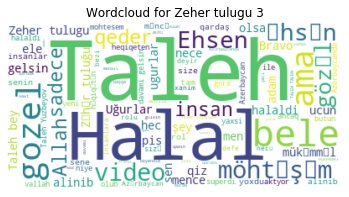

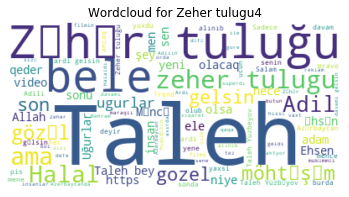

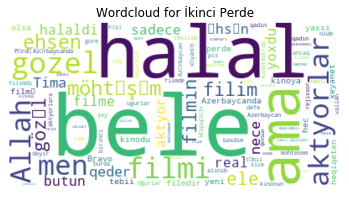

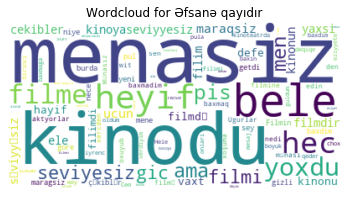

In [0]:
for filename in listdir("AZERBAIJAN MOVIES TEXT"):
    with open('AZERBAIJAN MOVIES TEXT\\{}'.format(filename), 'r', encoding = 'utf-8') as f:
        text = f.read()
        tokens = word_tokenize(text)
        
        # split into words by white space
        words = text.split()
        words = [word.lower() for word in words]
        words = [word for word in tokens if word.isalpha()]
        # filter out stop words
        
        stop_words = set(stopwords.words('azerbaijani'))
        stop_words.update(["film", "super", "kino", "əla", "ela","cox", "filmdi"])
        words = [w for w in words if not w.lower() in stop_words]
        words = [word for word in words if len(word) > 2]
        
        # prepare regex for char filtering
        re_punc = re.compile('[%s]' % re.escape(string.punctuation))
        # remove punctuation from each word
        
        stripped = [re_punc.sub('', w) for w in words]
        unique_string = (" ").join(stripped)
        wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(unique_string)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title('Wordcloud for {}'.format(filename[:-8]))
        plt.show()

## 3. Developing final model

We will develop a simple MLP model to predict the sentiment of encoded reviews. The model
will have an input layer that equals the number of words in the vocabulary, and in turn the
length of the input documents.  We can store this in a new variable called n words.

We can now define the network. All model configuration was found with very little trial and
error and should not be considered tuned for this problem. We will use a single hidden layer
with 150 neurons and a rectified linear activation function. The output layer is a single neuron
with a sigmoid activation function for predicting 0 for negative and 1 for positive reviews. The
network will be trained using the efficient Adam implementation of gradient descent and the
binary cross entropy loss function, suited to binary classification problems. We will keep track
of accuracy when training and evaluating the model.

In [16]:
# define the model
def define_model(n_words):
  # define network
  model = Sequential()
  model.add(Dense(150, input_shape=(n_words,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # compile network
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # summarize defined model
  model.summary()
  plot_model(model, to_file='model.png', show_shapes=True)
  return model
n_words = Xtest.shape[1]
model = define_model(n_words)
model.fit(Xtrain, y_train, epochs=20, verbose=2)

loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 150)               238950    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 151       
Total params: 239,101
Trainable params: 239,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 - 0s - loss: 0.6853 - accuracy: 0.5672
Epoch 2/20
 - 0s - loss: 0.6518 - accuracy: 0.5925
Epoch 3/20
 - 0s - loss: 0.6013 - accuracy: 0.5949
Epoch 4/20
 - 0s - loss: 0.5135 - accuracy: 0.7460
Epoch 5/20
 - 0s - loss: 0.3864 - accuracy: 0.9988
Epoch 6/20
 - 0s - loss: 0.2473 - accuracy: 0.9988
Epoch 7/20
 - 0s - loss: 0.1435 - accuracy: 0.9988
Epoch 8/20
 - 0s - loss: 0.0835 - accuracy: 0.9982
Epoch 9/20
 - 0s - loss: 0.0530 - accuracy: 0.9982
Epoch 10/20
 - 0s - loss: 0.0364 - accuracy: 0.9988

The texts to matrix() function for the Tokenizer in the Keras API provides 4 different
methods for scoring words; they are:
* binary Where words are marked as present (1) or absent (0).


* count Where the occurrence count for each word is marked as an integer.


* tfidf Where each word is scored based on their frequency, where words that are common
across all documents are penalized.


* freq Where words are scored based on their frequency of occurrence within the document.


We can evaluate the skill of the model developed in the previous section fit using each of the
4 supported word scoring modes. This first involves the development of a function to create an
encoding of the loaded documents based on a chosen scoring model. The function creates the
tokenizer, fits it on the training documents, then creates the train and test encodings using the
chosen model.

We also need a function to evaluate the MLP given a specific encoding of the data. Because
neural networks are stochastic, they can produce different results when the same model is fit on
the same data. This is mainly because of the random initial weights and the shuffling of patterns
during mini-batch gradient descent. This means that any one scoring of a model is unreliable
and we should estimate model skill based on an average of multiple runs. The function below,
named evaluate mode(), takes encoded documents and evaluates the MLP by training it on
the train set and estimating skill on the test set 10 times and returns a list of the accuracy
scores across all of these runs.

Streaming output truncated to the last 5000 lines.
Epoch 79/100
 - 0s - loss: 0.0014 - accuracy: 0.9994
Epoch 80/100
 - 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 81/100
 - 0s - loss: 0.0032 - accuracy: 0.9988
Epoch 82/100
 - 0s - loss: 0.0013 - accuracy: 0.9994
Epoch 83/100
 - 0s - loss: 0.0022 - accuracy: 0.9988
Epoch 84/100
 - 0s - loss: 0.0027 - accuracy: 0.9988
Epoch 85/100
 - 0s - loss: 0.0018 - accuracy: 0.9988
Epoch 86/100
 - 0s - loss: 0.0015 - accuracy: 0.9988
Epoch 87/100
 - 0s - loss: 0.0017 - accuracy: 0.9988
Epoch 88/100
 - 0s - loss: 0.0018 - accuracy: 0.9994
Epoch 89/100
 - 0s - loss: 0.0018 - accuracy: 0.9988
Epoch 90/100
 - 0s - loss: 0.0013 - accuracy: 0.9994
Epoch 91/100
 - 0s - loss: 0.0013 - accuracy: 0.9994
Epoch 92/100
 - 0s - loss: 9.4165e-04 - accuracy: 0.9994
Epoch 93/100
 - 0s - loss: 0.0018 - accuracy: 0.9994
Epoch 94/100
 - 0s - loss: 8.1314e-04 - accuracy: 1.0000
Epoch 95/100
 - 0s - loss: 0.0018 - accuracy: 0.9988
Epoch 96/100
 - 0s - loss: 0.0025 - accu

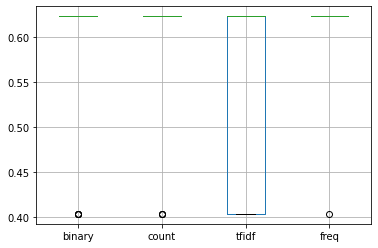

In [0]:
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r', encoding = 'utf-8')
    # read all text
    text = file.read()
    # close the file
    file.close
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('azerbaijani'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)
# load all docs in a directory
def process_docs(filename, vocab):
    lines = list()
            # load and clean the doc
    line = doc_to_line(filename, vocab)
            # add to list
    line = line.split()
    lines.append(line)
    data = lines[0]
    return (data)
def load_clean_dataset(vocab):
    # load documents
    neg = process_docs('negative_words_az.txt', vocab)
    pos = process_docs('positive_words_az.txt', vocab)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

def define_model(n_words):
  model = Sequential()
  model.add(Dense(50, input_shape = (n_words,), activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  model.summary()
  plot_model(model, to_file = 'output.png', show_shapes = True)
  return model

# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
  scores = list()
  n_repeats = 20
  n_words = Xtest.shape[1]
  for i in range(n_repeats):
    # define network
    model = define_model(n_words)
    # fit network
    model.fit(Xtrain, ytrain, epochs=100, verbose=2)
    # evaluate
    _, acc = model.evaluate(Xtest, ytest, verbose=0)
    scores.append(acc)
    print('%d accuracy: %s' % ((i+1), acc))
  return scores

def prepare_data(train_docs, test_docs, mode):
  # create the tokenizer
  tokenizer = Tokenizer()
  # fit the tokenizer on the documents
  tokenizer.fit_on_texts(train_docs)
  # encode training data set
  Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
  # encode training data set
  Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
  return Xtrain, Xtest

# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

train_docs, test_docs, ytrain, ytest = train_test_split(docs,labels, test_size = 0.2)

# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
  # prepare data for mode
  Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
  # evaluate model on data for mode
  results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)
# summarize results
print(results.describe())
results.boxplot()
pyplot.show()

At the end of the run, summary statistics for each word scoring method are provided,
summarizing the distribution of model skill scores across each of the 10 runs per mode. We can
see that the mean score of both the count and binary methods appear to be better than freq
and tfidf.



Finally, we can develop and use a final model to make predictions for new textual reviews. This
is why we wanted the model in the first place. First we will train a final model on all of the
available data. We will use the binary mode for scoring the bag-of-words model that was shown
to give the best results in the previous section.

Predicting the sentiment of new reviews involves following the same steps used to prepare
the test data. Specifically, loading the text, cleaning the document, filtering tokens by the
chosen vocabulary, converting the remaining tokens to a line, encoding it using the Tokenizer,
and making a prediction. We can now make predictions for new review texts. Below is an example with both a clearly
positive and a clearly negative review using the simple MLP developed above with the frequency
word scoring mode.

In [45]:
x = {}
for filename in listdir("AZERBAIJAN MOVIES TEXT"):
    with open('AZERBAIJAN MOVIES TEXT//{}'.format(filename), 'r', encoding = 'utf-8') as f:
        text = f.read()
        tokens = word_tokenize(text)
        # split into words by white space
        words = text.split()
        words = [word.lower() for word in words]
        words = [word for word in words if word.isalpha()]
        stop_words = set(stopwords.words('azerbaijani'))
        words = [w for w in words if not w in stop_words]
        words = [word for word in words if len(word) > 2]
        # prepare regex for char filtering
        re_punc = re.compile('[%s]' % re.escape(string.punctuation))
        # remove punctuation from each word
        words = [re_punc.sub('', w) for w in words]

        tokens = [w for w in words if w in vocab]
      # convert to line
        line = ' '.join(tokens)
      # encode
        encoded = tokenizer.texts_to_matrix([line], mode='binary')
      # predict sentiment
        yhat = model.predict(encoded, verbose=0)
      # retrieve predicted percentage and label
        percent_pos = yhat[0,0]
        
        x.update({filename[:-8]:[percent_pos, 1-percent_pos]})
        print(filename[:-8])
        print(1-percent_pos, 'NEGATIVE')
        print(percent_pos, 'POSITIVE')
        print(' ')
data = pd.DataFrame.from_dict(x, orient='index')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Axinla aşağı
0.022151029823350377 NEGATIVE
0.9778489701766496 POSITIVE
 
Yoxdu bele söhbet
0.0632707537050341 NEGATIVE
0.9367292462949659 POSITIVE
 
Shər qarışanda
0.10196400161033192 NEGATIVE
0.8980359983896681 POSITIVE
 
Yerli ecnebi
0.061691499476625666 NEGATIVE
0.9383085005233743 POSITIVE
 
Qorxu altinda
0.026057344880650923 NEGATIVE
0.9739426551193491 POSITIVE
 
Bir xalanın sirri
0.06557230605128639 NEGATIVE
0.9344276939487136 POSITIVE
 
Kəklikotu
0.07228412796848116 NEGATIVE
0.9277158720315188 POSITIVE
 
DƏRS
0.07370685101327756 NEGATIVE
0.9262931489867224 POSITIVE
 
İkinci Perde
0.09262524779502668 NEGATIVE
0.9073747522049733 POSITIVE
 
Zeher tulugu4
0.014880868445487971 NEGATIVE
0.985119131554512 POSITIVE
 
Yumurta
0.5076075448855839 NEGATIVE
0.49239245511441604 POSITIVE
 
My name is İntigam
0.010788278632342108 NEGATIVE
0.9892117213676579 POSITIVE
 
Aktrrsa
0.

In [4]:
# convert it to dataframe
data  = data.rename(columns = {'Unnamed: 0':'movie_name', '0':'positive_sentiment', '1':'negative_sentiment'})
data

movie_name  positive_sentiment  negative_sentiment
0             Axinla aşağı            0.977849            0.022151
1        Yoxdu bele söhbet            0.936729            0.063271
2           Shər qarışanda            0.898036            0.101964
3             Yerli ecnebi            0.938309            0.061691
4            Qorxu altinda            0.973943            0.026057
5        Bir xalanın sirri            0.934428            0.065572
6                Kəklikotu            0.927716            0.072284
7                     DƏRS            0.926293            0.073707
8             İkinci Perde            0.907375            0.092625
9            Zeher tulugu4            0.985119            0.014881
10                 Yumurta            0.492392            0.507608
11      My name is İntigam            0.989212            0.010788
12                 Aktrrsa            0.894482            0.105518
13               Oğlan evi            0.946171            0.053829
14               Oxşarabad            0.904128            0.095872
15           Meleyin opüşü            0.946380            0.053620
16                Qaranliq            0.970041            0.029959
17       Arzularin ardinca            0.904202            0.095798
18             Oğlan evi 2            0.984853            0.015147
19          Zeher tulugu 3            0.983561            0.016439
20                   Niyə3            0.974530            0.025470
21           Stalinin başı            0.934071            0.065929
22            Qız qaçırtma            0.907118            0.092882
23            Axirinci yol            0.909934            0.090066
24      Yarımçıq xatireler            0.894938            0.105062
25                   Hoqqa            0.957289            0.042711
26  Orta statistik rasim 1            0.934229            0.065771
27          Əfsanə qayıdır            0.918192            0.081808
28           3 Badam 1 qoz            0.901234            0.098766
29           Bayram axşamı            0.898289            0.101711
30               Gizlenpaç            0.966765            0.033235
31                   Xoxan            0.930683            0.069317
32                    Hozu            0.912048            0.087952

## 4. Visualizing the results and conclusion

The last thing we will do is to visual the results. We will use matplotlib library which is the most basic library for visualizing data graphically. It includes many of the graphs that we can think of. We will show movies with their positive sentiment values.

Often when visualizing data using a bar chart, you’ll have to make a decision about the orientation of your bars. While there are no concrete rules, there are quite a few factors that can go into making this decision. In this example, we are going to create a horizontal bar chart using using pandas plot() method.

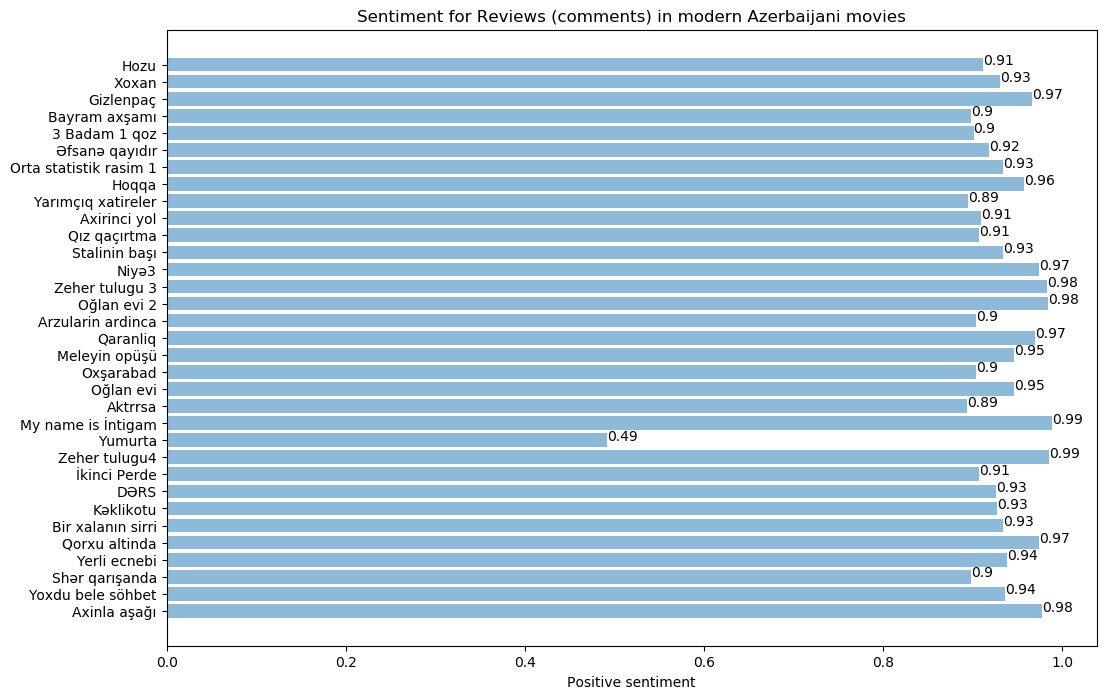

<Figure size 2000x2000 with 0 Axes>

In [45]:
objects = data['movie_name']
y_pos = np.arange(len(objects))
performance = data['positive_sentiment']
fig = plt.figure(figsize=(12, 8))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)



for index, value in enumerate(performance):
    plt.text(value, index, str(round(value,2)))

plt.xlabel('Positive sentiment')
plt.title('Sentiment for Reviews (comments) in modern Azerbaijani movies')
plt.figure(figsize=(20,20))
plt.show()

### Conclusion



Copyright &copy; 2020 [Nijat Zeynalov](https://github.com/NicatZeynalov/). Some codes has been taken from Jason Brownlee. The notebook are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).